## google revenue prediction
by snehasish pradhan

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import collections

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
from sklearn.model_selection import GroupKFold

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
from sklearn.metrics import r2_score

In [0]:
!pip install lightgbm

In [0]:
!pip install xgboost

In [0]:
!pip install catboost

In [0]:
import time
#import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
#import xgboost as xgb
#import catboost as ctb

In [0]:
pd.options.display.max_columns = None

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: Untitled0.ipynb, id: 1XHn_Q2WxC1UX6i7k5LAcN9nqBDgK53FC
title: predict9.csv, id: 1m79LUzkQqb5_JXAbDjZ2xLmvG3MgSEp-
title: data_train (1).csv, id: 1L1YN3bCShzaJZfA54D1c0Ukg2z41v5yB
title: data_test (1).csv, id: 1BRHh7gcX4WPg8lTsGBpGTPrOb1iEZUvK
title: data_test.csv, id: 1-wZjy1tENjPJjk4v6x42adO5O3OOVPYu
title: data_train.csv, id: 1TSvFHiKw2szHWT7Ss4U4P4d4DXl8tq8o
title: Colab Notebooks, id: 1BvIADMtwDV_6ov-q3I4nIxJbASwrhBiW


In [0]:
train_downloaded = drive.CreateFile({'id': '1L1YN3bCShzaJZfA54D1c0Ukg2z41v5yB'})
train_downloaded.GetContentFile('data_train (1).csv')

test_downloaded = drive.CreateFile({'id': '1BRHh7gcX4WPg8lTsGBpGTPrOb1iEZUvK'})
test_downloaded.GetContentFile('data_test (1).csv')

In [0]:
data_test = pd.read_csv('data_test (1).csv',dtype={'date': str, 'fullVisitorId': str, 'sessionId':str})

In [0]:
data_train = pd.read_csv('data_train (1).csv',dtype={'date': str, 'fullVisitorId': str, 'sessionId':str})

In [0]:
data_test.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,totals.bounces,totals.newVisits,totals.visits
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,1508151024,2,1508151024,Chrome,desktop,False,Macintosh,(not set),Asia,Singapore,(not set),myrepublic.com.sg,(not set),Southeast Asia,4,4.0,NaN,NaN,NaN,NaN,NaN,(not set),(not provided),organic,NaN,google,NaN,NaN,1
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,1508175522,1,1508175522,Chrome,desktop,False,Windows,Zaragoza,Europe,Spain,(not set),rima-tde.net,Aragon,Southern Europe,5,5.0,NaN,NaN,NaN,NaN,NaN,(not set),(not provided),organic,NaN,google,NaN,1.0,1
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,1508143220,1,1508143220,Chrome,desktop,False,Macintosh,not available in demo dataset,Europe,France,not available in demo dataset,sfr.net,not available in demo dataset,Western Europe,7,7.0,NaN,NaN,NaN,NaN,NaN,(not set),(not provided),organic,NaN,google,NaN,1.0,1
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,1508193530,1,1508193530,Safari,mobile,True,iOS,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,8,4.0,NaN,NaN,NaN,NaN,NaN,(not set),(not provided),organic,NaN,google,NaN,1.0,1
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,1508217442,1,1508217442,Safari,desktop,False,Macintosh,San Jose,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,9,4.0,NaN,NaN,NaN,NaN,NaN,(not set),(not provided),organic,NaN,google,NaN,1.0,1


In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 34 columns):
channelGrouping                                 903653 non-null object
date                                            903653 non-null object
fullVisitorId                                   903653 non-null object
sessionId                                       903653 non-null object
visitId                                         903653 non-null int64
visitNumber                                     903653 non-null int64
visitStartTime                                  903653 non-null int64
device.browser                                  903653 non-null object
device.deviceCategory                           903653 non-null object
device.isMobile                                 903653 non-null bool
device.operatingSystem                          903653 non-null object
geoNetwork.city                                 903653 non-null object
geoNetwork.continent                      

In [0]:
target_f  = data_train['totals.transactionRevenue'].fillna(0).astype(float)

In [0]:
target1  = data_train[['fullVisitorId','totals.transactionRevenue']].copy()

In [0]:
target1['totals.transactionRevenue']=target1['totals.transactionRevenue'].fillna(0).astype(float)

In [0]:
target1.head()

In [0]:
target2 = target1[['fullVisitorId', 'totals.transactionRevenue']].groupby('fullVisitorId').sum()

In [0]:
del target1

In [0]:
target2.head()

,totals.transactionRevenue
fullVisitorId,
0000010278554503158,0.0
0000020424342248747,0.0
0000027376579751715,0.0
0000039460501403861,0.0
0000040862739425590,0.0


In [0]:
target_f = target_f.apply(lambda x: np.log(x) if x>0 else x)

In [0]:
target_f.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: totals.transactionRevenue, dtype: float64

In [0]:
del data_train['totals.transactionRevenue']

##graphs

In [0]:
plt.scatter(target.values,target.index)
plt.xlabel('transactionRevenue')
plt.show()

In [0]:
data_train.isnull().sum().plot(kind='bar',figsize=(20,8))
plt.xlabel("Column Name")
plt.ylabel("Count")
plt.title("Missing Value Count By Columns")
plt.show()

In [0]:
data_train.select_dtypes('object').describe()

In [0]:
data_test.select_dtypes('object').describe()

In [0]:
data_train.select_dtypes(exclude=('object')).describe()

In [0]:
corr

In [0]:
corr1 = data_train[['date','visitId','visitNumber','visitStartTime','totals.hits','totals.pageviews','trafficSource.adwordsClickInfo.page']].corr()

In [0]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr1,annot=True)
plt.xticks(rotation='vertical')
plt.show()

In [0]:
print(data_train.shape,data_test.shape)

In [0]:
trn_len = data_train.shape[0]
merged_df = pd.concat([data_train, data_test])

In [0]:
for col in merged_df.columns:
    if col in ['fullVisitorId']: continue
    if merged_df[col].dtypes == object or merged_df[col].dtypes == bool:
        merged_df[col], indexer = pd.factorize(merged_df[col])

data_train = merged_df[:trn_len]
data_test = merged_df[trn_len:]

In [0]:
data_train.head()

In [0]:
data_test.head()

In [0]:
data_train.isnull().sum().plot(kind='bar',figsize=(20,8))
plt.xlabel('columns')
plt.ylabel('counts')
plt.show()

In [0]:
plt.figure(figsize=(10,8))
plt.scatter(data_train['totals.pageviews'],target.values)
plt.xlabel('pageviews')
plt.ylabel('transactionRevenue')
plt.show()

## By LightGBM

In [0]:
param={'learning_rate': 0.01,
        'objective':'regression',
        'metric':'rmse',
        'num_leaves': 64,
        'verbose': 1,
        "subsample": 0.99,
        "colsample_bytree": 0.99,
        "random_state":42,
        'max_depth': 15,
        'lambda_l2': 0.02085548700474218,
        'lambda_l1': 0.004107624022751344,
        'min_child_samples': 21
       }


In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)
oof = np.zeros(len(data_train))
predictions = np.zeros(len(data_test))
start = time.time()
features = list(data_train.columns)
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx,val_idx) in enumerate(folds.split(data_train.values,target.values)):
  trn_data = lgb.Dataset(data_train.iloc[trn_idx].values, label = target.iloc[trn_idx].values)
  val_data = lgb.Dataset(data_train.iloc[val_idx].values, label = target.iloc[val_idx].values)
  
  num_round = 10000
  clf = lgb.train(param,trn_data, num_round, valid_sets = [trn_data,val_data], verbose_eval = 100, early_stopping_rounds = 100)
  oof[val_idx] = clf.predict(data_train.iloc[val_idx].values, num_iteration = clf.best_iteration)
  
  fold_importance_df = pd.DataFrame()
  fold_importance_df['feature'] = features
  fold_importance_df['importance'] = clf.feature_importance()
  fold_importance_df['fold'] = fold_ + 1
  feature_importance_df = pd.concat([feature_importance_df,fold_importance_df],axis=0)
  
  predictions += clf.predict(data_test.values, num_iteration = clf.best_iteration) / folds.n_splits
  


In [0]:
print("CV score: {:<8.5f}".format(mean_squared_error(oof, target)**0.5))

In [0]:
plt.figure(figsize=(20,8))
plt.plot(target.values,label='actual')
plt.plot(oof,label='predicted')
plt.legend()
plt.title('prediction at learning rate >> 0.03 with regression')
plt.show()

In [0]:
data_train.shape

In [0]:
plt.scatter(target.values,target.index)
plt.show()

In [0]:
plt.scatter(target.values,oof)
plt.show()

In [0]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:1000].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [0]:
submission = data_test[['fullVisitorId']].copy()
submission.loc[:, 'PredictedLogRevenue'] = predictions
grouped_test = submission[['fullVisitorId', 'PredictedLogRevenue']].groupby('fullVisitorId').sum().reset_index()

In [0]:
grouped_test.fullVisitorId.nunique()

In [0]:
grouped_test.to_csv('submit.csv',index=False)

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'df_train.csv'})
uploaded.SetContentString('df_train.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
file = drive.CreateFile({'root':[{u'id': '1fU-jsdWYNKlBLY2i5LQOZK2waohC1Mnd'}]}) 
file.SetContentFile("submit.csv")
file.Upload()

## By Xgboost

In [0]:
sns.distplot(target.values,hist=False)
plt.show()

In [0]:
paramm={'eta': 0.02,
        'objective':'reg:linear',
        'booster': 'gbtree',
        'eval_metric':'rmse',
        'nthread': 4,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "random_state":42,
        'max_depth': 10,
        'gamma':0,
        'min_child_weight': 3
       }

In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)
#oof = np.zeros(len(data_train))
predictions = np.zeros(len(data_test))
start = time.time()
#features = list(data_train.columns)
#feature_importance_df = pd.DataFrame()

for fold_, (trn_idx,val_idx) in enumerate(folds.split(data_train.values,target.values)):
  trn_data = xgb.DMatrix(data_train.iloc[trn_idx].values, target.iloc[trn_idx].values)
  val_data = xgb.DMatrix(data_train.iloc[val_idx].values, target.iloc[val_idx].values)
  
  #tes_data = xgb.DMatrix(test[data_test.values)
  
  watchlist = [(trn_data,'train'), (val_data,'valid')]
  num_round = 2000
  clf = xgb.train(paramm,trn_data, num_round, watchlist, verbose_eval = 100, early_stopping_rounds = 100)
  #oof = clf.predict(data_train.iloc[val_idx].values)
  
  '''fold_importance_df = pd.DataFrame()
  fold_importance_df['feature'] = features
  fold_importance_df['importance'] = clf.feature_importance()
  fold_importance_df['fold'] = fold_ + 1
  feature_importance_df = pd.concat([feature_importance_df,fold_importance_df],axis=0)'''
  
  #predictions += clf.predict(data_test.values) / folds.n_splits
  


In [0]:
xdtrain = xgb.DMatrix(data_train.values)

In [0]:
oof = clf.predict(xdtrain)

In [0]:
print("CV score: {:<8.5f}".format(mean_squared_error(oof, target)**0.5))

In [0]:
plt.figure(figsize=(20,8))
plt.plot(target.values)
plt.plot(oof)
plt.show()

In [0]:
f, axes = plt.subplots(1, 2)
sns.distplot(target.values , ax=axes[0])
sns.distplot(oof, ax=axes[1])
plt.show()

In [0]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
axes[0].scatter(target.values,target.index)
axes[1].scatter(oof,target.index)
plt.show()

In [0]:
xdtest = xgb.DMatrix(data_test.values)

In [0]:
predictions = clf.predict(xdtest)

In [0]:
submission = data_test[['fullVisitorId']].copy()
submission.loc[:, 'PredictedLogRevenue'] = predictions
grouped_test = submission[['fullVisitorId', 'PredictedLogRevenue']].groupby('fullVisitorId').sum().reset_index()

In [0]:
grouped_test.to_csv('submit2.csv',index=False)

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'df_train.csv'})
uploaded.SetContentString('df_train.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
file = drive.CreateFile({'root':[{u'id': '1Ei31f9S1uKrZdw5EP673y7pl8Q2xjpu9'}]}) 
file.SetContentFile("submit2.csv")
file.Upload()

## lightgbm new

In [0]:
for df in [data_train, data_test]:
    df['date'] = pd.to_datetime(df['visitStartTime'], unit='s')
    df['sess_date_dow'] = df['date'].dt.dayofweek
    df['sess_date_hours'] = df['date'].dt.hour
    df['sess_date_dom'] = df['date'].dt.day

In [0]:
data_train.head(2)

In [0]:
f,ax = plt.subplots(1,3,figsize=(20,8))
ax[0].scatter(data_train['sess_date_dow'],target.values)
ax[1].scatter(data_train['sess_date_hours'],target.values)
ax[2].scatter(data_train['sess_date_dom'],target.values)
ax[0].set_xlabel('sess_date_dow')
ax[1].set_xlabel('sess_date_hours')
ax[2].set_xlabel('sess_date_dom')
ax[0].set_ylabel('transactionRevenue')
plt.show()

In [0]:
data_train['device.browser'][data_train['device.deviceCategory'] == 'desktop'] = 'desktop_browser'
data_train['device.browser'][data_train['device.deviceCategory'] == 'mobile'] = 'mobile_browser'
data_train['device.browser'][data_train['device.deviceCategory'] == 'tablet'] = 'mobile_browser'

In [0]:
data_test['device.browser'][data_test['device.deviceCategory'] == 'desktop'] = 'desktop_browser'
data_test['device.browser'][data_test['device.deviceCategory'] == 'mobile'] = 'mobile_browser'
data_test['device.browser'][data_test['device.deviceCategory'] == 'tablet'] = 'mobile_browser'

In [0]:
data_test.head(2)

In [0]:
data_test['device.browser'].unique()

In [0]:
del data_train['device.deviceCategory'],data_train['device.isMobile'],data_test['device.deviceCategory'],data_test['device.isMobile']

In [0]:
dmtr = pd.get_dummies(data_train['device.browser'])
dmts = pd.get_dummies(data_test['device.browser'])

In [0]:
data_train = pd.concat([data_train,dmtr],axis=1)

In [0]:
data_test = pd.concat([data_test,dmts],axis=1)

In [0]:
del dmtr,dmts,data_train['device.browser'],data_test['device.browser']

In [0]:
data_train.head(2)

In [0]:
excluded_features = ['date', 'fullVisitorId', 'sessionId']

categorical_features = [
    _f for _f in data_train.columns
    if (_f not in excluded_features) & (data_train[_f].dtype == 'object')
]

In [0]:
categorical_features

In [0]:
for f in categorical_features:
    data_train[f], indexer = pd.factorize(data_train[f])
    data_test[f] = indexer.get_indexer(data_test[f])

In [0]:
data_train.head(2)

In [0]:
train_set1 = ['visitId','visitNumber','visitStartTime','geoNetwork.city','geoNetwork.continent','geoNetwork.country','geoNetwork.metro','geoNetwork.networkDomain','geoNetwork.region','geoNetwork.subContinent','sess_date_dow','sess_date_hours','sess_date_dom']

In [0]:
train_set2 = ['visitId','visitNumber','visitStartTime','device.operatingSystem','totals.hits','totals.pageviews','trafficSource.adContent','trafficSource.adwordsClickInfo.adNetworkType','trafficSource.adwordsClickInfo.gclId','trafficSource.adwordsClickInfo.page','trafficSource.adwordsClickInfo.slot','trafficSource.campaign','trafficSource.keyword','trafficSource.medium','trafficSource.referralPath','trafficSource.source','desktop_browser','mobile_browser']

In [0]:
train_dta1 = data_train[train_set1]
test_dta1 = data_test[train_set1]

In [0]:
train_dta1.shape

In [0]:
'''cat_param = {
    'iterations':2000,
    'learning_rate':0.02,
    'depth':10,
    'eval_metric':'RMSE',
    'random_seed':42,
    'bagging_temperature':0.2,
    'od_type':'Iter',
    'metric_period':50,
    'od_wait':20
    
}'''

In [0]:
param={'learning_rate': 0.01,
        'objective':'regression',
        'metric':'rmse',
        'num_leaves': 64,
        'verbose': 1,
        "subsample": 0.99,
        "colsample_bytree": 0.99,
        "random_state":42,
        'max_depth': 15,
        'lambda_l2': 0.02085548700474218,
        'lambda_l1': 0.004107624022751344,
        'min_child_samples': 21
       }

In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)
oof = np.zeros(len(data_train))
predictions = np.zeros(len(data_test))
start = time.time()

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train_dta1.values,target.values)):
  trn_data = lgb.Dataset(train_dta1.iloc[trn_idx].values, label = target.iloc[trn_idx].values)
  val_data = lgb.Dataset(train_dta1.iloc[val_idx].values, label = target.iloc[val_idx].values)
  
  num_round = 10000
  clf = lgb.train(param,trn_data, num_round, valid_sets = [trn_data,val_data], verbose_eval = 100, early_stopping_rounds = 100)
  oof[val_idx] = clf.predict(train_dta1.iloc[val_idx].values, num_iteration = clf.best_iteration)
  
  
  predictions += clf.predict(test_dta1.values, num_iteration = clf.best_iteration) / folds.n_splits
  

In [0]:
oof[oof<0] = 0

In [0]:
predictions[predictions<0] = 0

In [0]:
print("CV score: {:<8.5f}".format(mean_squared_error(oof, target)**0.5))

In [0]:
train_dta2 = data_train[train_set2]
test_dta2 = data_test[train_set2]

In [0]:
train_dta2['pred1'] = oof

In [0]:
test_dta2['pred1'] = predictions

In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)
oof2 = np.zeros(len(data_train))
predictions2 = np.zeros(len(data_test))
start = time.time()

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train_dta2.values,target.values)):
  trn_data = lgb.Dataset(train_dta2.iloc[trn_idx].values, label = target.iloc[trn_idx].values)
  val_data = lgb.Dataset(train_dta2.iloc[val_idx].values, label = target.iloc[val_idx].values)
  
  num_round = 10000
  clf = lgb.train(param,trn_data, num_round, valid_sets = [trn_data,val_data], verbose_eval = 100, early_stopping_rounds = 100)
  oof2[val_idx] = clf.predict(train_dta2.iloc[val_idx].values, num_iteration = clf.best_iteration)
  
  
  predictions2 += clf.predict(test_dta2.values, num_iteration = clf.best_iteration) / folds.n_splits
  

In [0]:
oof2[oof2<0]=0

In [0]:
predictions2[predictions2<0] = 0

In [0]:
print("CV score: {:<8.5f}".format(mean_squared_error(oof2, target)**0.5))

In [0]:
plt.plot(target.values)
plt.plot(oof2)
plt.show()

In [0]:
data_train['prediction_1'] = oof

In [0]:
data_train['prediction_2'] = oof2

In [0]:
data_test['prediction_1'] = predictions
data_test['prediction_2'] = predictions2

In [0]:
data_test.shape

In [0]:
train_features = [
    _f for _f in data_train.columns
    if (_f not in excluded_features)
]

In [0]:
new_train = data_train[train_features]
new_test = data_test[train_features]

In [0]:
new_test.shape

In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)
oof3 = np.zeros(len(data_train))
predictions3 = np.zeros(len(data_test))
start = time.time()

for fold_, (trn_idx,val_idx) in enumerate(folds.split(new_train.values,target.values)):
  trn_data = lgb.Dataset(new_train.iloc[trn_idx].values, label = target.iloc[trn_idx].values)
  val_data = lgb.Dataset(new_train.iloc[val_idx].values, label = target.iloc[val_idx].values)
  
  num_round = 10000
  clf = lgb.train(param,trn_data, num_round, valid_sets = [trn_data,val_data], verbose_eval = 100, early_stopping_rounds = 100)
  oof3[val_idx] = clf.predict(new_train.iloc[val_idx].values, num_iteration = clf.best_iteration)
  
  
  predictions3 += clf.predict(new_test.values, num_iteration = clf.best_iteration) / folds.n_splits
  

In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)

for fold_, (trn_idx,val_idx) in enumerate(folds.split(new_train.values,target.values)):
  trn_x, trn_y = new_train.iloc[trn_idx].values, target.iloc[trn_idx].values
  val_x, val_y = new_train.iloc[val_idx].values, target.iloc[val_idx].values
  
  cat = ctb.CatBoostRegressor(iterations=1000,learning_rate=0.02,depth=10,eval_metric='RMSE',
                            random_seed = 42,
                            bagging_temperature = 0.2,
                            od_type='Iter',
                            metric_period = 50,
                            od_wait=20)
  
  cat.fit(trn_x, trn_y, eval_set=[(val_x, val_y)],early_stopping_rounds=50,use_best_model=True,verbose=100)


In [0]:
oof = cat.predict(new_train)

In [0]:
plt.plot(target.values)
plt.plot(oof3)
plt.show()

In [0]:
print("CV score: {:<8.5f}".format(mean_squared_error(oof3, target)**0.5))

In [0]:
submission = data_test[['fullVisitorId']].copy()
submission.loc[:, 'PredictedLogRevenue'] = tst_prediction2
grouped_test = submission[['fullVisitorId', 'PredictedLogRevenue']].groupby('fullVisitorId').sum().reset_index()

In [0]:
grouped_test.shape

In [0]:
grouped_test.to_csv('submit2.csv',index=False)

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'df_train.csv'})
uploaded.SetContentString('df_train.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
file = drive.CreateFile({'root':[{u'id': '1ImLjxVftIYrVP-v1TLyvdEEKtKvjl_5L'}]}) 
file.SetContentFile("submit2.csv")
file.Upload()

##converting data

In [0]:
data_train.head(3)

In [0]:
t = data_train['trafficSource.referralPath'].str.split('/',expand=True)

In [0]:
t.replace('','/',inplace=True)

In [0]:
t.columns = ['referralPath_1','referralPath_2','referralPath_3','referralPath_4','referralPath_5','referralPath_6','referralPath_7','referralPath_8','referralPath_9'
             ,'referralPath_10','referralPath_11','referralPath_12','referralPath_13','referralPath_14']

In [0]:
t.iloc[903633]

In [0]:
data_train = pd.concat([data_train,t],axis=1)

In [0]:
data_train.head(3)

In [0]:
t1 = data_test['trafficSource.referralPath'].str.split('/',expand=True)

In [0]:
t1.replace('','/',inplace=True)
t1.columns= ['referralPath_1','referralPath_2','referralPath_3','referralPath_4','referralPath_5','referralPath_6','referralPath_7','referralPath_8','referralPath_9'
             ,'referralPath_10','referralPath_11']

In [0]:
data_test = pd.concat([data_test,t1],axis=1)

In [0]:
data_test['referralPath_12'] = np.nan
data_test['referralPath_13'] = np.nan
data_test['referralPath_14'] = np.nan

In [0]:
print(data_train.shape,data_test.shape)

(903653, 47) (804684, 47)


In [0]:
del t,t1,data_train['trafficSource.referralPath'],data_test['trafficSource.referralPath']

In [0]:
data_train['trafficSource.adContent'].unique()

In [0]:
def ad_mapping(x):
    if  ('google' in x):
        return 'google'
    elif  ('placement' in x) | ('placememnt' in x):
        return 'placement'
    elif '(not set)' in x or 'nan' in x:
        return x
    elif 'ad' in x:
        return 'ad'
    else:
        return 'others'

In [0]:
data_train['trafficSource.adContent'] = data_train['trafficSource.adContent'].map(lambda x: ad_mapping(str(x).lower())).astype(str)

In [0]:
data_test['trafficSource.adContent'] = data_test['trafficSource.adContent'].map(lambda x: ad_mapping(str(x).lower())).astype(str)

In [0]:
data_train['trafficSource.adContent'].unique()

In [0]:
data_test.head(3)

In [0]:
data_test['trafficSource.adContent'].unique()

In [0]:
data_train['device.browser'].nunique()

54

In [0]:
data_train.head(3)

In [0]:
 t = data_train['geoNetwork.networkDomain'].str.split('.',expand=True)

In [0]:
t.columns = ['networkDomain_1','networkDomain_2','networkDomain_3']

In [0]:
t.head()

In [0]:
t1 = data_test['geoNetwork.networkDomain'].str.split('.',expand=True)

In [0]:
t1.columns = ['networkDomain_1','networkDomain_2','networkDomain_3']

In [0]:
data_train = pd.concat([data_train,t],axis=1)
data_test = pd.concat([data_test,t1],axis=1)

In [0]:
del t,t1,data_train['geoNetwork.networkDomain'],data_test['geoNetwork.networkDomain']

In [0]:
data_train.head(3)

In [0]:
data_train['trafficSource.source'].unique()

In [0]:
def source_mapping(x):
    if  ('google' in x):
        return 'google'
    elif  ('youtube' in x):
        return 'youtube'
    elif '(not set)' in x or 'nan' in x:
        return x
    elif 'yahoo' in x:
        return 'yahoo'
    elif 'facebook' in x:
        return 'facebook'
    elif 'reddit' in x:
        return 'reddit'
    elif 'bing' in x:
        return 'bing'
    elif 'quora' in x:
        return 'quora'
    elif 'outlook' in x:
        return 'outlook'
    elif 'linkedin' in x:
        return 'linkedin'
    elif 'pinterest' in x:
        return 'pinterest'
    elif 'ask' in x:
      return 'ask'
    elif 'siliconvalley' in x:
        return 'siliconvalley'
    elif 'lunametrics' in x:
        return 'lunametrics'
    elif 'amazon' in x:
        return 'amazon'
    elif 'mysearch' in x:
        return 'mysearch'
    elif 'qiita' in x:
        return 'qiita'
    elif 'messenger' in x:
        return 'messenger'
    elif 'twitter' in x:
        return 'twitter'
    elif 't.co' in x:
        return 't.co'
    elif 'vk.com' in x:
        return 'vk.com'
    elif 'search' in x:
        return 'search'
    elif 'edu' in x:
      return 'edu'
    elif 'mail' in x:
        return 'mail'
    elif 'ad' in x:
        return 'ad'
    elif 'golang' in x:
        return 'golang'
    elif 'direct' in x:
        return 'direct'
    elif 'dealspotr' in x:
        return 'dealspotr'
    elif 'sashihara' in x:
        return 'sashihara'
    elif 'phandroid' in x:
        return 'phandroid'
    elif 'baidu' in x:
        return 'baidu'
    elif 'mdn' in x:
        return 'mdn'
    elif 'duckduckgo' in x:
        return 'duckduckgo'
    elif 'seroundtable' in x:
        return 'seroundtable'
    elif 'metrics' in x:
      return 'metrics'
    elif 'sogou' in x:
        return 'sogou'
    elif 'businessinsider' in x:
        return 'businessinsider'
    elif 'github' in x:
        return 'github'
    elif 'gophergala' in x:
        return 'gophergala'
    elif 'yandex' in x:
        return 'yandex'
    elif 'msn' in x:
        return 'msn'
    elif 'dfa' in x:
        return 'dfa'
    elif 'feedly' in x:
        return 'feedly'
    elif 'arstechnica' in x:
        return 'arstechnica'
    elif 'squishable' in x:
      return 'squishable'
    elif 'flipboard' in x:
        return 'flipboard'
    elif 't-online.de' in x:
        return 't-online.de'
    elif 'sm.cn' in x:
        return 'sm.cn'
    elif 'wow' in x:
        return 'wow'
    elif 'baidu' in x:
        return 'baidu'
    elif 'partners' in x:
        return 'partners'
    else:
        return 'others'

In [0]:
data_train['trafficSource.source'] = data_train['trafficSource.source'].map(lambda x: source_mapping(str(x).lower())).astype(str)
data_test['trafficSource.source'] = data_test['trafficSource.source'].map(lambda x: source_mapping(str(x).lower())).astype(str)

In [0]:
data_train['trafficSource.source'].nunique()

In [0]:
data_train.head(3)

In [0]:
data_train['trafficSource.adwordsClickInfo.adNetworkType'].unique()

In [0]:
data_test.head(3)

In [0]:
data_train.head(3)

In [0]:
df_browser = data_train[['device.browser','totals.transactionRevenue']].groupby(data_train['device.browser']).aggregate({'totals.transactionRevenue':['sum']}).reset_index()

In [0]:
df_browser.columns = ['device.browser','totals.transactionRevenue_sum']

In [0]:
df_browser=df_browser[df_browser['totals.transactionRevenue_sum']>0]

In [0]:
df_browser

,device.browser,totals.transactionRevenue_sum
3,Amazon Silk,2.999000e+07
6,Android Webview,1.148500e+08
11,Chrome,1.383105e+12
15,Edge,6.482970e+09
16,Firefox,8.931632e+10
20,Internet Explorer,8.255550e+09
36,Opera,2.153500e+08
40,Safari,5.239748e+10
41,Safari (in-app),1.537700e+08


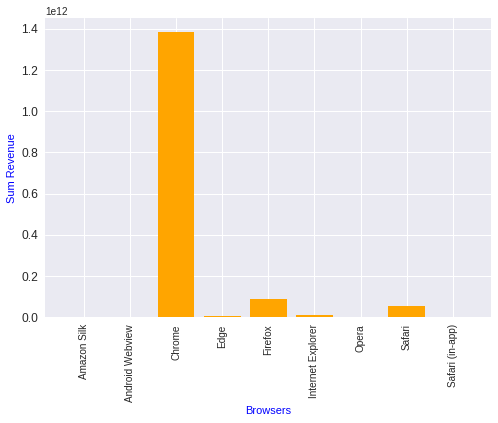

In [0]:
plt.bar(range(len(df_browser)),df_browser['totals.transactionRevenue_sum'],color='orange')
plt.xlabel('Browsers',color='b')
plt.ylabel('Sum Revenue',color='b')
plt.xticks(range(len(df_browser)),df_browser['device.browser'],rotation=90)
plt.yticks(fontsize=12)
plt.show()

In [0]:
def process_device(data_df):
  
  colm = ['Amazon Silk','Android Webview','Chrome','Edge','Firefox','Internet Explorer','Opera','Safari','Safari (in-app)']
  
  data_df['device.browser'][(data_df['device.deviceCategory'] == 'desktop') & (~data_df['device.browser'].isin(colm))]='desktop_browser'
  data_df['device.browser'][(data_df['device.deviceCategory'] == 'tablet') & (~data_df['device.browser'].isin(colm))]='tablet_browser'
  data_df['device.browser'][(data_df['device.deviceCategory'] == 'mobile') & (~data_df['device.browser'].isin(colm))]='mobile_browser'
  return data_df

In [0]:
data_train = process_device(data_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [0]:
data_test = process_device(data_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [0]:
data_train['device.browser'].nunique()

12

In [0]:
data_train['device.deviceCategory'].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [0]:
data_train.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,totals.bounces,totals.newVisits,totals.visits,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),Izmir,Western Asia,1,1.0,nan,NaN,NaN,NaN,NaN,(not set),(not provided),organic,google,1.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ttnet,com,tr
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,Australasia,1,1.0,nan,NaN,NaN,NaN,NaN,(not set),(not provided),organic,google,1.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dodo,net,au
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),Community of Madrid,Southern Europe,1,1.0,nan,NaN,NaN,NaN,NaN,(not set),(not provided),organic,google,1.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,None


In [0]:
data_test.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,totals.bounces,totals.newVisits,totals.visits,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,1508151024,2,1508151024,Chrome,desktop,False,Macintosh,(not set),Asia,Singapore,(not set),(not set),Southeast Asia,4,4.0,nan,NaN,NaN,NaN,NaN,(not set),(not provided),organic,google,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,myrepublic,com,sg
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,1508175522,1,1508175522,Chrome,desktop,False,Windows,Zaragoza,Europe,Spain,(not set),Aragon,Southern Europe,5,5.0,nan,NaN,NaN,NaN,NaN,(not set),(not provided),organic,google,NaN,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rima-tde,net,None
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,1508143220,1,1508143220,Chrome,desktop,False,Macintosh,not available in demo dataset,Europe,France,not available in demo dataset,not available in demo dataset,Western Europe,7,7.0,nan,NaN,NaN,NaN,NaN,(not set),(not provided),organic,google,NaN,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sfr,net,None


In [0]:
print(data_train.shape,data_test.shape)

(903653, 48) (804684, 48)


In [0]:
excluded_features = ['date', 'fullVisitorId', 'sessionId','visitId','visitStartTime']

categorical_features = [
    _f for _f in data_train.columns
    if ((_f not in excluded_features) & (data_train[_f].dtype == 'object'))
]

In [0]:
categorical_features

['channelGrouping',
 'device.browser',
 'device.deviceCategory',
 'device.operatingSystem',
 'geoNetwork.city',
 'geoNetwork.continent',
 'geoNetwork.country',
 'geoNetwork.metro',
 'geoNetwork.region',
 'geoNetwork.subContinent',
 'trafficSource.adContent',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'trafficSource.adwordsClickInfo.gclId',
 'trafficSource.adwordsClickInfo.slot',
 'trafficSource.campaign',
 'trafficSource.keyword',
 'trafficSource.medium',
 'trafficSource.source',
 'referralPath_1',
 'referralPath_2',
 'referralPath_3',
 'referralPath_4',
 'referralPath_5',
 'referralPath_6',
 'referralPath_7',
 'referralPath_8',
 'referralPath_9',
 'referralPath_10',
 'referralPath_11',
 'referralPath_12',
 'referralPath_13',
 'referralPath_14',
 'networkDomain_1',
 'networkDomain_2',
 'networkDomain_3']

In [0]:
data_train.fillna(value=np.nan, inplace=True)
data_test.fillna(value=np.nan,inplace=True)

In [0]:
data_train[categorical_features]=data_train[categorical_features].fillna('nan')

In [0]:
data_test[categorical_features]=data_test[categorical_features].fillna('nan')

In [0]:
data_test.head(3)

In [0]:
data_train.head(3)

In [0]:
train_dta = data_train.copy()
test_dta = data_test.copy()

In [0]:
for df in [train_dta, test_dta]:
    df['date'] = pd.to_datetime(df['visitStartTime'], unit='s')
    df['sess_date_doy'] = df['date'].dt.month
    df['sess_date_dow'] = df['date'].dt.dayofweek
    df['sess_date_hours'] = df['date'].dt.hour
    df['sess_date_dom'] = df['date'].dt.day

In [0]:
train_dta.head(3)

,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.campaign,trafficSource.keyword,trafficSource.source,totals.bounces,totals.newVisits,totals.visits,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,Amazon Silk,Android Webview,Chrome,Edge,Firefox,Internet Explorer,Opera,Safari,Safari (in-app),desktop_browser,mobile_browser,tablet_browser,desktop,mobile,tablet,(Other),Affiliates,Direct,Display,Organic Search,Paid Search,Referral,Social,Google Display Network,RHS,Top,Content,Google Search,Search partners,affiliate,cpc,cpm,organic,referral,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom
0,2016-09-02 15:33:05,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,False,Windows,Izmir,Asia,Turkey,(not set),Izmir,Western Asia,1,1.0,nan,nan,NaN,(not set),(not provided),google,1.0,1.0,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,ttnet,com,tr,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9,4,15,2
1,2016-09-03 05:22:27,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,Australasia,1,1.0,nan,nan,NaN,(not set),(not provided),google,1.0,1.0,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,dodo,net,au,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9,5,5,3
2,2016-09-03 01:16:26,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,False,Windows,Madrid,Europe,Spain,(not set),Community of Madrid,Southern Europe,1,1.0,nan,nan,NaN,(not set),(not provided),google,1.0,1.0,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown,unknown,nan,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9,5,1,3


In [0]:
for i in categorical_features:
  train_dta[i][train_dta[i]=='(not set)'] = 'nan'
  train_dta[i][train_dta[i]=='(not provided)'] = 'nan'
  train_dta[i][train_dta[i]=='not available in demo dataset'] = 'nan'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
for i in categorical_features:
  test_dta[i][test_dta[i]=='(not set)'] = 'nan'
  test_dta[i][test_dta[i]=='(not provided)'] = 'nan'
  test_dta[i][test_dta[i]=='not available in demo dataset'] = 'nan'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
train_dta['target'] = target.copy()

In [0]:
train_dta.head(3)

,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.campaign,trafficSource.keyword,trafficSource.source,totals.bounces,totals.newVisits,totals.visits,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,Amazon Silk,Android Webview,Chrome,Edge,Firefox,Internet Explorer,Opera,Safari,Safari (in-app),desktop_browser,mobile_browser,tablet_browser,desktop,mobile,tablet,(Other),Affiliates,Direct,Display,Organic Search,Paid Search,Referral,Social,Google Display Network,RHS,Top,Content,Google Search,Search partners,affiliate,cpc,cpm,organic,referral,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom
0,2016-09-02 15:33:05,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,False,Windows,Izmir,Asia,Turkey,nan,Izmir,Western Asia,1,1.0,nan,nan,NaN,nan,nan,google,1.0,1.0,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,ttnet,com,tr,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9,4,15,2
1,2016-09-03 05:22:27,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,False,Macintosh,nan,Oceania,Australia,nan,nan,Australasia,1,1.0,nan,nan,NaN,nan,nan,google,1.0,1.0,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,dodo,net,au,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9,5,5,3
2,2016-09-03 01:16:26,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,False,Windows,Madrid,Europe,Spain,nan,Community of Madrid,Southern Europe,1,1.0,nan,nan,NaN,nan,nan,google,1.0,1.0,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown,unknown,nan,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9,5,1,3


In [0]:
f, axes = plt.subplots(1, 4,figsize=(28,8))
sns.barplot(x="sess_date_dom", y="target", data=train_dta,ax=axes[0])
sns.barplot(x="sess_date_dow", y="target", data=train_dta,ax=axes[1])
sns.barplot(x="sess_date_hours", y="target", data=train_dta,ax=axes[2])
sns.barplot(x="sess_date_doy", y="target", data=train_dta,ax=axes[3])
plt.show()

In [0]:
categorical_features

In [0]:
lis1=[]
for i in categorical_features:
  lis1.extend(train_dta[i].unique())

In [0]:
for i in categorical_features:
  lis1.extend(test_dta[i].unique())

In [0]:
lis1 = list(set(lis1))

In [0]:
le=LabelEncoder()

In [0]:
le.fit(lis1)

LabelEncoder()

In [0]:
for i in categorical_features:
  train_dta[i] = le.transform(train_dta[i])

In [0]:
for i in categorical_features:
  test_dta[i] = le.transform(test_dta[i])

In [0]:
del lis1,categorical_features,le

In [0]:
test_dta.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,totals.bounces,totals.newVisits,totals.visits,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom
0,61912,2017-10-16 10:50:24,6167871330617112363,6167871330617112363_1508151024,1508151024,2,1508151024,31218,72475,False,61588,89090,1254,62291,89090,89090,62333,4,4.0,89090,89090,89090,NaN,89090,89090,89090,91594,77591,NaN,NaN,1,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,88974,70527,96940,10,0,10,16
1,61912,2017-10-16 17:38:42,0643697640977915618,0643697640977915618_1508175522,1508175522,1,1508175522,31218,72475,False,62699,62961,60750,62340,89090,1242,62337,5,5.0,89090,89090,89090,NaN,89090,89090,89090,91594,77591,NaN,1.0,1,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,95117,89500,89090,10,0,17,16
2,61912,2017-10-16 08:40:20,6059383810968229466,6059383810968229466_1508143220,1508143220,1,1508143220,31218,72475,False,61588,89090,60750,60795,89090,89090,62676,7,7.0,89090,89090,89090,NaN,89090,89090,89090,91594,77591,NaN,1.0,1,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,89090,96923,89500,89090,10,0,8,16


## Training

In [0]:
exclude_set1 =['date','fullVisitorId','sessionId','visitId','visitStartTime','target','sess_date_dow','sess_date_hours','sess_date_dom','device.deviceCategory','device.isMobile']
exclude_set2 =['date','fullVisitorId','sessionId','visitId','visitStartTime','target','sess_date_dow','sess_date_hours','sess_date_doy','device.deviceCategory','device.isMobile']
exclude_set3 =['date','fullVisitorId','sessionId','visitId','visitStartTime','target','sess_date_dow','sess_date_dom','sess_date_doy','device.deviceCategory','device.isMobile']
exclude_set4 =['date','fullVisitorId','sessionId','visitId','visitStartTime','target','sess_date_hours','sess_date_dom','sess_date_doy','device.deviceCategory','device.isMobile']

In [0]:
exclude_set5 =['date','fullVisitorId','sessionId','visitId','visitStartTime','target','sess_date_hours','sess_date_dow','device.deviceCategory','device.isMobile']
#del exclude_set1,exclude_set2,exclude_set3,exclude_set4

In [0]:
exclude_set6 =['date','fullVisitorId','sessionId','visitId','visitStartTime','target','device.deviceCategory','device.isMobile']
#del exclude_set5

In [0]:
training_features = [f for f in train_dta.columns if(f not in exclude_set1)]

In [0]:
training_features

In [0]:
del train_dta['device.isMobile'],test_dta['device.isMobile']

In [0]:
train_dta.head(3)

In [0]:
print(train_dta[training_features].shape,test_dta[training_features].shape)

In [0]:
train_dta.head(3)

In [0]:
sns.distplot(train_dta['referralPath_9'])
plt.show()

In [0]:
train_dta['geoNetwork.city'].corr(train_dta['geoNetwork.continent'])

In [0]:
train_dta.corr()

In [0]:
param={'learning_rate': 0.02,
        'objective':'regression',
        'metric':'rmse',
        'num_leaves': 64,
        'verbose': 1,
        "subsample": 0.99,
        "colsample_bytree": 0.99,
        "random_state":42,
        'max_depth': 15,
        'lambda_l2': 0.02085548700474218,
        'lambda_l1': 0.004107624022751344,
        'min_child_samples': 21
       }


In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train_dta.values,target.values)):
  trn_x, trn_y = train_dta[training_features].iloc[trn_idx], target.iloc[trn_idx]
  val_x, val_y = train_dta[training_features].iloc[val_idx], target.iloc[val_idx]
  
  reg = lgb.LGBMRegressor(**param,n_estimators=1100)
  
  reg.fit(trn_x, trn_y,eval_set=[(val_x, val_y)],early_stopping_rounds=50,verbose=100,eval_metric='rmse')

In [0]:
oof = reg.predict(train_dta[training_features])

In [0]:
#predictions = reg.predict(test_dta)

In [0]:
#sns.distplot(oof)
plt.plot(target.values)
plt.plot(oof)
plt.show()

In [0]:
mean_squared_error(oof,target)**0.5

##traindm

In [0]:
training_features = [f for f in train_dta.columns if(f not in exclude_set2)]

In [0]:
training_features

In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train_dta.values,target.values)):
  trn_x, trn_y = train_dta[training_features].iloc[trn_idx], target.iloc[trn_idx]
  val_x, val_y = train_dta[training_features].iloc[val_idx], target.iloc[val_idx]
  
  reg = lgb.LGBMRegressor(**param,n_estimators=1100)
  
  reg.fit(trn_x, trn_y,eval_set=[(val_x, val_y)],early_stopping_rounds=50,verbose=100,eval_metric='rmse')

In [0]:
oof1 = reg.predict(train_dta[training_features])

In [0]:
del oof1

In [0]:
mean_squared_error(oof1,target)**0.5

In [0]:
r2_score(oof1,target)

##traindy-m

In [0]:
training_features = [f for f in train_dta.columns if(f not in exclude_set5)]

In [0]:
training_features

In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train_dta.values,target.values)):
  trn_x, trn_y = train_dta[training_features].iloc[trn_idx], target.iloc[trn_idx]
  val_x, val_y = train_dta[training_features].iloc[val_idx], target.iloc[val_idx]
  
  reg = lgb.LGBMRegressor(**param,n_estimators=1100)
  
  reg.fit(trn_x, trn_y,eval_set=[(val_x, val_y)],early_stopping_rounds=50,verbose=100,eval_metric='rmse')

In [0]:
oof3 = reg.predict(train_dta[training_features])

In [0]:
mean_squared_error(oof3,target)**0.5

In [0]:
del oof3

##trainT

In [0]:
exclude_set6 =['date','fullVisitorId','sessionId','visitId','visitStartTime','target','device.isMobile']

In [0]:
training_features = [f for f in train_dta.columns if(f not in exclude_set6)]

In [0]:
training_features

In [0]:
test_dta.head(3)

In [0]:
param={'learning_rate': 0.02,
        'objective':'regression',
        'metric':'rmse',
        'num_leaves': 64,
        "subsample": 0.99,
        "colsample_bytree": 0.99,
        "random_state":42,
        'max_depth': 15,
        'lambda_l2': 0.02085548700474218,
        'lambda_l1': 0.004107624022751344,
        'min_child_samples': 21
       }


In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train_dta.values,target_f.values)):
  trn_x, trn_y = train_dta[training_features].iloc[trn_idx], target_f.iloc[trn_idx]
  val_x, val_y = train_dta[training_features].iloc[val_idx], target_f.iloc[val_idx]
  
  reg = lgb.LGBMRegressor(**param,n_estimators=1100)
  
  reg.fit(trn_x, trn_y,eval_set=[(val_x, val_y)],early_stopping_rounds=50,verbose=100,eval_metric='rmse')

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.64623
[200]	valid_0's rmse: 1.62193
[300]	valid_0's rmse: 1.61731
[400]	valid_0's rmse: 1.61575
[500]	valid_0's rmse: 1.61475
[600]	valid_0's rmse: 1.61442
Early stopping, best iteration is:
[643]	valid_0's rmse: 1.61418
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.65478
[200]	valid_0's rmse: 1.62707
[300]	valid_0's rmse: 1.62088
[400]	valid_0's rmse: 1.61891
[500]	valid_0's rmse: 1.618
[600]	valid_0's rmse: 1.61776
[700]	valid_0's rmse: 1.61759
Early stopping, best iteration is:
[667]	valid_0's rmse: 1.61742
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.64942
[200]	valid_0's rmse: 1.62546
[300]	valid_0's rmse: 1.62154
[400]	valid_0's rmse: 1.61981
Early stopping, best iteration is:
[418]	valid_0's rmse: 1.61965
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.66044
[200]	valid_0's rms

In [0]:
oof4 = reg.predict(train_dta[training_features])

In [0]:
mean_squared_error(oof4,target_f)**0.5

1.508143337721527

In [0]:
predictions4 = reg.predict(test_dta[training_features])

In [0]:
del folds,reg,trn_x,trn_y,val_x,val_y

In [0]:
train_dta['prediction'] = oof4
test_dta['prediction'] = predictions4

In [0]:
print("CV score: {:<8.5f}".format(mean_squared_error(oof4, target_f)**0.5))

CV score: 1.45582 


In [0]:
#sns.distplot(oof4)
#f,axes = plt.subplots(1,2,figsize=(20,8))
plt.plot(target_f.values)
plt.plot(oof4)
#axes[1].plot(predictions)
plt.show()

In [0]:
t = pd.DataFrame()
t['original'] = target.values.copy()
t['prediction'] = oof4

In [0]:
t.head(10)

In [0]:
del t

In [0]:
del data_train,data_test

In [0]:
submission = test_dta[['fullVisitorId']].copy()
submission.loc[:, 'PredictedLogRevenue'] = predictions4
grouped_test = submission[['fullVisitorId', 'PredictedLogRevenue']].groupby('fullVisitorId').sum().reset_index()

In [0]:
grouped_test.shape

(617242, 2)

In [0]:
grouped_test.to_csv('submitp2.csv',index=False)

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'df_train.csv'})
uploaded.SetContentString('df_train.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1uFdbGOT8Ii0kVPFfrwgp5tZkQUQMNhs8


In [0]:
file = drive.CreateFile({'root':[{u'id': '1uFdbGOT8Ii0kVPFfrwgp5tZkQUQMNhs8'}]}) 
file.SetContentFile("submitp2.csv")
file.Upload()

## GroupKFold Training

In [0]:
def get_folds(df=None,n_splits=5):
  unique_vis = np.array(sorted(df['fullVisitorId'].unique()))
  
  folds = GroupKFold(n_splits=n_splits)
  fold_ids = []
  ids = np.arange(df.shape[0])
  for trn_vis,val_vis in folds.split(X=unique_vis, y=unique_vis,groups=unique_vis):
    fold_ids.append(
     
        [
            ids[df['fullVisitorId'].isin(unique_vis[trn_vis])],
            ids[df['fullVisitorId'].isin(unique_vis[val_vis])]
        ]
    )
  return(fold_ids)

In [0]:
train_dta = data_train
test_dta = data_test

In [0]:
del data_train,data_test

In [0]:
folds = get_folds(df=train_dta,n_splits=5)

In [0]:
train_feature = [f for f in train_dta.columns if f not in excluded_features]

In [0]:
for fold_, (trn_id,val_id) in enumerate(folds):
  trn_x,trn_y = train_dta[train_feature].iloc[trn_id],target.iloc[trn_id]
  val_x,val_y = train_dta[train_feature].iloc[val_id],target.iloc[val_id]
  reg = lgb.LGBMRegressor(
                          num_leaves=31,
                          learning_rate = 0.02,
                          n_estimators = 1000,
                          subsample = .9,
                          colsample_bytree= .9,
                          random_state = 1
                          )
  reg.fit(trn_x, trn_y, eval_set=[(val_x,val_y)], early_stopping_rounds=50, verbose=100, eval_metric='rmse')

In [0]:
oof = reg.predict(train_dta[train_feature])

In [0]:
predictions = reg.predict(test_dta[train_feature])

In [0]:
oof[oof<0]=0
predictions[predictions<0]=0

In [0]:
print("cv score : {:<8.5f}".format(mean_squared_error(oof,target)**0.5))

In [0]:
train_dta['prediction'] = oof
test_dta['prediction'] = predictions

In [0]:
del oof,predictions,folds,trn_x,trn_y,val_x,val_y

In [0]:
train_dta.shape

In [0]:
trng_data = train_dta[train_feature + ['fullVisitorId']].groupby('fullVisitorId').mean()

In [0]:
trng_data.head(3)

In [0]:
trn_pred_list = train_dta[['fullVisitorId', 'prediction']].groupby('fullVisitorId')\
    .apply(lambda df: list(df.prediction))\
    .apply(lambda x: {'pred_'+str(i): pred for i, pred in enumerate(x)})

In [0]:
trn_all_prediction = pd.DataFrame(list(trn_pred_list.values),index = trng_data.index)

In [0]:
del trn_pred_list

In [0]:
trn_feats = trn_all_prediction.columns

In [0]:
trn_all_prediction['t_mean'] = np.log1p(trn_all_prediction[trn_feats].mean(axis=1))

In [0]:
trn_all_prediction['t_median'] = np.log1p(trn_all_prediction[trn_feats].median(axis=1))

In [0]:
trn_all_prediction['t_sum'] = np.log1p(trn_all_prediction[trn_feats].sum(axis=1))

In [0]:
trn_all_prediction['t_sum_act'] = np.log1p(trn_all_prediction[trn_feats].fillna(0).sum(axis=1))

In [0]:
trn_all_prediction['t_nb_sess'] = np.log1p(trn_all_prediction[trn_feats].isnull().sum(axis=1))

In [0]:
trng_data = pd.concat([trng_data,trn_all_prediction],axis=1)

In [0]:
del trn_all_prediction

In [0]:
trng_data.to_csv('new_train.csv',index=True)

In [0]:
del trng_data

In [0]:
tstg_data = test_dta[train_feature + ['fullVisitorId']].groupby('fullVisitorId').mean()

In [0]:
tst_pred_list = test_dta[['fullVisitorId', 'prediction']].groupby('fullVisitorId')\
    .apply(lambda df: list(df.prediction))\
    .apply(lambda x: {'pred_'+str(i): pred for i, pred in enumerate(x)})

In [0]:
tst_all_prediction = pd.DataFrame(list(tst_pred_list.values),index = tstg_data.index)

In [0]:
del tst_pred_list,trn_feats

In [0]:
tst_feats = tst_all_prediction.columns

In [0]:
tst_all_prediction['t_mean'] = np.log1p(tst_all_prediction[tst_feats].mean(axis=1))

In [0]:
tst_all_prediction['t_median'] = np.log1p(tst_all_prediction[tst_feats].median(axis=1))

In [0]:
tst_all_prediction['t_sum'] = np.log1p(tst_all_prediction[tst_feats].sum(axis=1))

In [0]:
tst_all_prediction['t_sum_act'] = np.log1p(tst_all_prediction[tst_feats].fillna(0).sum(axis=1))

In [0]:
tst_all_prediction['t_nb_sess'] = np.log1p(tst_all_prediction[tst_feats].isnull().sum(axis=1))

In [0]:
tstg_data = pd.concat([tstg_data,tst_all_prediction],axis=1)

In [0]:
tstg_data.to_csv('new_test.csv',index=True)

In [0]:
del tstg_data

In [0]:
del tst_all_prediction,test_dta,tst_feats

In [0]:
train_dta['target'] = target

In [0]:
target = train_dta[['fullVisitorId', 'target']].groupby('fullVisitorId').sum()

In [0]:
del train_dta

In [0]:
target.head(2)

In [0]:
target.to_csv('new_target.csv',index=True)

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'newtarget.csv'})
uploaded.SetContentString('df_train.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
file = drive.CreateFile({'root':[{u'id': '1cPW4rsDjmUrfe7PzUxV7nbmNdLelMPi2'}]}) 
file.SetContentFile("new_target.csv")
file.Upload()

##sum

In [0]:
del data_train,data_test

In [0]:
print(train_dta.shape,test_dta.shape)

(903653, 52) (804684, 52)


In [0]:
test_dta.head(2)

In [0]:
exclude_set6 =['date','fullVisitorId','sessionId','visitId','visitStartTime','target','device.isMobile']

In [0]:
training_features = [f for f in train_dta.columns if(f not in exclude_set6)]

In [0]:
training_features

In [0]:
train = train_dta[training_features +['fullVisitorId']].groupby('fullVisitorId').mean()

In [0]:
test = test_dta[training_features +['fullVisitorId']].groupby('fullVisitorId').mean()

In [0]:
train_min = train_dta[training_features +['fullVisitorId']].groupby('fullVisitorId').min()

In [0]:
test_min = test_dta[training_features +['fullVisitorId']].groupby('fullVisitorId').min()

In [0]:
col_min = [str(x)+'_min' for x in train_min.columns]

In [0]:
train_min.columns = [col_min]
test_min.columns = [col_min]

In [0]:
del col_min

In [0]:
train_max = train_dta[training_features +['fullVisitorId']].groupby('fullVisitorId').max()

In [0]:
test_max = test_dta[training_features +['fullVisitorId']].groupby('fullVisitorId').max()

In [0]:
col_max = [str(x)+'_max' for x in train_max.columns]

In [0]:
train_max.columns = [col_max]
test_max.columns = [col_max]

In [0]:
train = pd.concat([train,train_min],axis=1)
test = pd.concat([test,test_min],axis=1)

In [0]:
del train_min,test_min

In [0]:
train = pd.concat([train,train_max],axis=1)
test = pd.concat([test,test_max],axis=1)

In [0]:
del train_max,test_max

In [0]:
print(train.shape,test.shape)

(714167, 138) (617242, 138)


In [0]:
target2.head(3)

,totals.transactionRevenue
fullVisitorId,
0000010278554503158,0.0
0000020424342248747,0.0
0000027376579751715,0.0


In [0]:
target = target2['totals.transactionRevenue'].copy()
target.head()

fullVisitorId
0000010278554503158    0.0
0000020424342248747    0.0
0000027376579751715    0.0
0000039460501403861    0.0
0000040862739425590    0.0
Name: totals.transactionRevenue, dtype: float64

In [0]:
target = target.apply(lambda x: np.log(x) if x>0 else x)

In [0]:
target.max()

25.068543291710952

In [0]:
print(train.shape,test.shape)

(714167, 138) (617242, 138)


In [0]:
train['totals.bounces'].unique()

array([nan,  1.])

In [0]:
param={'learning_rate': 0.02,
        'objective':'regression',
        'metric':'rmse',
        'num_leaves': 64,
        "subsample": 0.99,
        "colsample_bytree": 0.99,
        "random_state":42,
        'max_depth': 15,
        'lambda_l2': 0.02085548700474218,
        'lambda_l1': 0.004107624022751344,
        'min_child_samples': 21,
        'feature_fraction': 0.5, # randomly select a fraction of the features.
        'bagging_fraction': 0.5, # randomly bag or subsample training data.
        'bagging_freq': 20, # perform bagging every Kth iteration, disabled if 0.
       }


In [0]:
xgb_params={'eta': 0.02,
        'objective':'reg:linear',
        'booster': 'gbtree',
        'eval_metric':'rmse',
        'nthread': 4,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "random_state":42,
        'max_depth': 10,
        'gamma':0,
        'min_child_weight': 3
       }

In [0]:
del train_dta,test_dta,target2,exclude_set6

In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train.values,target.values)):
  trn_x, trn_y = train.iloc[trn_idx], target.iloc[trn_idx]
  val_x, val_y = train.iloc[val_idx], target.iloc[val_idx]
  
  reg = lgb.LGBMRegressor(**param,n_estimators=1200)
  
  reg.fit(trn_x, trn_y,eval_set=[(val_x, val_y)],early_stopping_rounds=50,verbose=100,eval_metric='rmse')

In [0]:
folds = KFold(n_splits=3, shuffle=True, random_state=42)
oof7 = np.zeros(len(train))
predictions7 = np.zeros(len(test))

oof7_x = np.zeros(len(train))
predictions7_x = np.zeros(len(test))

both_oof = np.zeros(len(train))
sub_preds = np.zeros(len(test))

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train.values,target.values)):
  trn_x, trn_y = train.iloc[trn_idx], target.iloc[trn_idx]
  val_x, val_y = train.iloc[val_idx], target.iloc[val_idx]
  
  xg = xgb.XGBRegressor(**xgb_params, n_estimators=1200)
  
  reg = lgb.LGBMRegressor(**param,n_estimators=1200)
  
  print("-"* 20 + "LightGBM Training" + "-"* 20)
  reg.fit(trn_x, trn_y,eval_set=[(val_x, val_y)],early_stopping_rounds=50,verbose=100,eval_metric='rmse')
  
  print("-"* 20 + "Xgboost Training" + "-"* 20)
  xg.fit(trn_x,trn_y,eval_set=[(val_x,val_y)],early_stopping_rounds=50,verbose=100,eval_metric='rmse')
  
  oof7[val_idx] = reg.predict(val_x,num_iteration=reg.best_iteration_)
  oof7_x[val_idx] = xg.predict(val_x)
  
  both_oof[val_idx] = oof7[val_idx] * 0.6 + oof7_x[val_idx] * 0.4
  
  predictions7 = reg.predict(test.values, num_iteration = reg.best_iteration_)
  predictions7_x = xg.predict(test[train.columns])
  
  sub_preds += ((predictions7) * 0.6 + (predictions7_x) * 0.4)/folds.n_splits

--------------------LightGBM Training--------------------
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.64698
[200]	valid_0's rmse: 1.6156
[300]	valid_0's rmse: 1.61301
[400]	valid_0's rmse: 1.61146
Early stopping, best iteration is:
[446]	valid_0's rmse: 1.61043
--------------------Xgboost Training--------------------
[0]	validation_0-rmse:2.05055
Will train until validation_0-rmse hasn't improved in 50 rounds.
Stopping. Best iteration:
[40]	validation_0-rmse:1.62744

--------------------LightGBM Training--------------------
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.62225
[200]	valid_0's rmse: 1.59597
[300]	valid_0's rmse: 1.59166
[400]	valid_0's rmse: 1.59024
[500]	valid_0's rmse: 1.58855
Early stopping, best iteration is:
[462]	valid_0's rmse: 1.58805
--------------------Xgboost Training--------------------
[0]	validation_0-rmse:2.01345
Will train until validation_0-rmse hasn't improved in 50 rounds.

In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)
oof7 = np.zeros(len(train))
predictions7 = np.zeros(len(test))

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train.values,target.values)):
  trn_x, trn_y = train.iloc[trn_idx], target.iloc[trn_idx]
  val_x, val_y = train.iloc[val_idx], target.iloc[val_idx]
  
  reg = lgb.LGBMRegressor(**param,n_estimators=1200)
  
  reg.fit(trn_x, trn_y,eval_set=[(val_x, val_y)],early_stopping_rounds=50,verbose=100,eval_metric='rmse')
  
  oof7[val_idx] = reg.predict(train.iloc[val_idx].values,num_iteration=reg.best_iteration_)
  
  predictions7 += reg.predict(test.values, num_iteration = reg.best_iteration_) / folds.n_splits

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.63426
[200]	valid_0's rmse: 1.60061
[300]	valid_0's rmse: 1.59688
Early stopping, best iteration is:
[296]	valid_0's rmse: 1.59682
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.66111
[200]	valid_0's rmse: 1.62824
[300]	valid_0's rmse: 1.62296
[400]	valid_0's rmse: 1.62144
[500]	valid_0's rmse: 1.62018
[600]	valid_0's rmse: 1.62089
Early stopping, best iteration is:
[558]	valid_0's rmse: 1.61945
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.62238
[200]	valid_0's rmse: 1.59082
[300]	valid_0's rmse: 1.58713
[400]	valid_0's rmse: 1.58333
Early stopping, best iteration is:
[388]	valid_0's rmse: 1.58295
Training until validation scores don't improve for 50 rounds.
[100]	valid_0's rmse: 1.62952
[200]	valid_0's rmse: 1.601
[300]	valid_0's rmse: 1.59386
[400]	valid_0's rmse: 1.59181
[500]	valid_0's rmse: 1.59094
Early stopping, bes

In [0]:
del train_dta,test_dta

In [0]:
off6 = reg.predict(train)

In [0]:
predictions = reg.predict(test)

In [0]:
off6[off6<0]=0
predictions[predictions<0]=0

In [0]:
mean_squared_error(both_oof,target)**0.5

1.5975131113657315

In [0]:
train['prediction']=off6
test['prediction']=predictions

In [0]:
train['totals.pageviews'].max()

466.0

In [0]:
f,ax=plt.subplots(2,2,figsize=(20,8))
ax[0][0].scatter(train['totals.hits'],train['prediction'])
ax[0][1].scatter(train['totals.pageviews'],train['prediction'])
ax[0][0].set_ylabel('predicted_revenue')
ax[1][0].scatter(train['totals.hits'],target.values)
ax[1][1].scatter(train['totals.pageviews'],target.values)
ax[1][0].set_xlabel('hits')
ax[1][1].set_xlabel('pageviews')
ax[1][0].set_ylabel('actual_revenue')
plt.show()

In [0]:
train.head(3)

,channelGrouping,visitNumber,device.browser,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,totals.bounces,totals.newVisits,totals.visits,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom,prediction
fullVisitorId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000010278554503158,61905.0,1.0,72467.0,61582.0,89081.0,61869.0,61799.0,89081.0,89081.0,1275.0,11.0,8.0,89081.0,89081.0,89081.0,NaN,89081.0,89081.0,89081.0,91585.0,77582.0,NaN,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,106052.0,70320.0,90841.0,10.0,4.0,5.0,21.0,0.024298
0000020424342248747,61905.0,1.0,72467.0,62690.0,61486.0,1195.0,61972.0,89081.0,61534.0,62313.0,17.0,13.0,89081.0,89081.0,89081.0,NaN,89081.0,89081.0,89081.0,91585.0,77582.0,NaN,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,88773.0,77397.0,92308.0,12.0,3.0,7.0,1.0,0.061677
0000027376579751715,61905.0,1.0,72467.0,61582.0,89081.0,1195.0,62564.0,89081.0,89081.0,61845.0,6.0,5.0,89081.0,89081.0,89081.0,NaN,89081.0,89081.0,89081.0,91585.0,77582.0,NaN,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,70543.0,89491.0,89081.0,2.0,6.0,2.0,12.0,-0.000352


In [0]:
train.corr()

In [0]:
hitpage = pd.DataFrame()
hitpage['hits'] = train['totals.hits'].copy()
hitpage['page'] = train['totals.pageviews'].copy()
hitpage['vistno.'] = train['visitNumber'].copy()
hitpage['vistno.'] = train['visitNumber'].copy()
hitpage['actual'] = target.copy()
hitpage['predicted'] = train['prediction'].copy()

In [0]:
hitpage['error'] = (hitpage['actual'] - hitpage['predicted'])**2

In [0]:
hitpage['error'] = (hitpage['error'])**0.5

In [0]:
hitpage=hitpage.reset_index()

In [0]:
hitpage['error']  = hitpage['error'].apply(lambda x: np.log(x) if x>0 else x)

In [0]:
hitpage.head(3)

,hits,page,vistno.,actual,predicted,error
fullVisitorId,,,,,,
0000010278554503158,11.0,8.0,1.0,0.0,0.024298,0.024298
0000020424342248747,17.0,13.0,1.0,0.0,0.061677,0.061677
0000027376579751715,6.0,5.0,1.0,0.0,-0.000352,0.000352


In [0]:
hitpage['error'][hitpage['error']<0]=0

In [0]:
hitpage.error.min()

8.392380351172755e-07

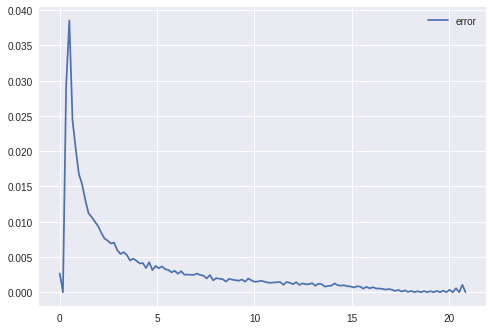

In [0]:
#plt.scatter(hitpage['hits'],hitpage.error)
sns.kdeplot(hitpage.error)
plt.show()

In [0]:
del train['prediction'],test['prediction']

In [0]:
test.head(2)

,channelGrouping,visitNumber,device.browser,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,totals.bounces,totals.newVisits,totals.visits,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom
fullVisitorId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000000259678714014,61905.0,1.5,72467.0,61582.0,61732.000000,1195.0,62564.0,62181.0,31130.000000,61845.0,9.5,6.5,89081.0,89081.0,89081.0,NaN,89081.0,89081.0,89081.0,91585.0,77582.0,NaN,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,96088.0,96088.0,89081.0,11.0,1.5,11.5,28.5
0000049363351866189,50718.0,2.0,72467.0,31216.0,70522.333333,1252.0,61354.0,89081.0,70543.666667,62327.0,1.0,1.0,89081.0,89081.0,89081.0,NaN,89081.0,89081.0,89081.0,17.0,72770.0,1.0,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,9.0,1.0,9.0,19.0


##target_error

In [0]:
del train['error'],test['error']

In [0]:
target_error = hitpage.error.copy()

In [0]:
target_error.head()

fullVisitorId
0000010278554503158    0.024298
0000020424342248747    0.061677
0000027376579751715    0.000352
0000039460501403861    0.002914
0000040862739425590    0.007818
Name: error, dtype: float64

In [0]:
param1={'learning_rate': 0.03,
        'objective':'regression',
        'metric':'rmse',
        'num_leaves': 128,
        "subsample": 0.99,
        "colsample_bytree": 0.99,
        "random_state":42,
        'max_depth': 15,
        'lambda_l2': 0.02085548700474218,
        'lambda_l1': 0.004107624022751344,
        'min_child_samples': 21
       }


In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train.values,target_error.values)):
  trn_x, trn_y = train.iloc[trn_idx], target_error.iloc[trn_idx]
  val_x, val_y = train.iloc[val_idx], target_error.iloc[val_idx]
  
  reg = lgb.LGBMRegressor(**param1,n_estimators=1100)
  
  reg.fit(trn_x, trn_y,eval_set=[(val_x, val_y)],early_stopping_rounds=100,verbose=100,eval_metric='rmse')

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.830793
[200]	valid_0's rmse: 0.821686
[300]	valid_0's rmse: 0.819065
[400]	valid_0's rmse: 0.818604
Early stopping, best iteration is:
[375]	valid_0's rmse: 0.818387
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.888409
[200]	valid_0's rmse: 0.877344
[300]	valid_0's rmse: 0.875067
[400]	valid_0's rmse: 0.874093
[500]	valid_0's rmse: 0.873985
Early stopping, best iteration is:
[435]	valid_0's rmse: 0.873942
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.849589
[200]	valid_0's rmse: 0.839341
[300]	valid_0's rmse: 0.837553
[400]	valid_0's rmse: 0.836812
[500]	valid_0's rmse: 0.836773
Early stopping, best iteration is:
[491]	valid_0's rmse: 0.836632
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.844369
[200]	valid_0's rmse: 0.836593
[300]	valid_0's rmse: 0.834472
[400]	valid_0's rmse: 0

In [0]:
test_err = reg.predict(test)
train_error = reg.predict(train)

In [0]:
mean_squared_error(train_error,target_error)**0.5

0.7221061117372544

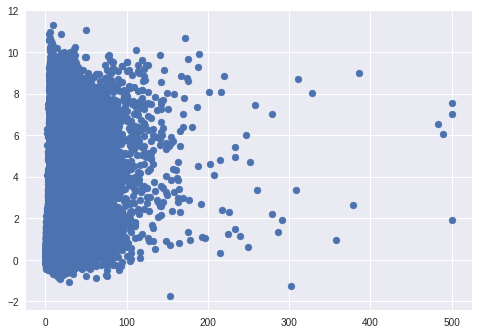

In [0]:
plt.scatter(hitpage['hits'],train_error)
plt.show()

In [0]:
train['error'] = train_error

In [0]:
test['error'] = test_err

In [0]:
test['error'][test['error']<0]=0

In [0]:
train.head(3)

,channelGrouping,visitNumber,device.browser,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,totals.bounces,totals.newVisits,totals.visits,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom,error
fullVisitorId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000010278554503158,61905.0,1.0,72467.0,61582.0,89081.0,61869.0,61799.0,89081.0,89081.0,1275.0,11.0,8.0,89081.0,89081.0,89081.0,NaN,89081.0,89081.0,89081.0,91585.0,77582.0,NaN,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,106052.0,70320.0,90841.0,10.0,4.0,5.0,21.0,0.031624
0000020424342248747,61905.0,1.0,72467.0,62690.0,61486.0,1195.0,61972.0,89081.0,61534.0,62313.0,17.0,13.0,89081.0,89081.0,89081.0,NaN,89081.0,89081.0,89081.0,91585.0,77582.0,NaN,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,88773.0,77397.0,92308.0,12.0,3.0,7.0,1.0,0.141883
0000027376579751715,61905.0,1.0,72467.0,61582.0,89081.0,1195.0,62564.0,89081.0,89081.0,61845.0,6.0,5.0,89081.0,89081.0,89081.0,NaN,89081.0,89081.0,89081.0,91585.0,77582.0,NaN,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,70543.0,89491.0,89081.0,2.0,6.0,2.0,12.0,-0.004534


In [0]:
train.corr()

##main_train

In [0]:
del test['prediction'],train['prediction']

In [0]:
param2={'learning_rate': 0.03,
        'objective':'regression',
        'metric':'rmse',
        'num_leaves': 64,
        "subsample": 0.99,
        "colsample_bytree": 0.99,
        "random_state":42,
        'max_depth': 15,
        'lambda_l2': 0.02085548700474218,
        'lambda_l1': 0.004107624022751344,
        'min_child_samples': 21
       }


In [0]:
target.head()

In [0]:
folds = KFold(n_splits=6, shuffle=True, random_state=42)

for fold_, (trn_idx,val_idx) in enumerate(folds.split(train.values,target.values)):
  trn_x, trn_y = train.iloc[trn_idx], target.iloc[trn_idx]
  val_x, val_y = train.iloc[val_idx], target.iloc[val_idx]
  
  reg = lgb.LGBMRegressor(**param2,n_estimators=1200)
  
  reg.fit(trn_x, trn_y,eval_set=[(val_x, val_y)],early_stopping_rounds=50,verbose=100,eval_metric='rmse')

In [0]:
oof7 = reg.predict(train)

In [0]:
predictions1 = reg.predict(test)

In [0]:
target_test = target.copy()

In [0]:
target_test=target_test.reset_index()

In [0]:
target_test.columns

Index(['fullVisitorId', 'totals.transactionRevenue'], dtype='object')

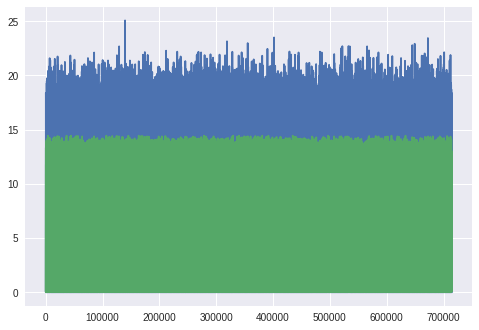

In [0]:
plt.plot(target_test['totals.transactionRevenue'])
plt.plot(oof7)
plt.show()

In [0]:
del oof7,target_test

In [0]:
mean_squared_error(oof7,target)**0.5

1.3762363634475832

In [0]:
data_train['device.deviceCategory'].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [0]:
#f,ax = plt.subplots(1,3,figsize=(20,8))
#ax[0].scatter(hitpage.hits,hitpage.error)
#ax[1].scatter(hitpage.page,hitpage.error)
#ax[2].scatter(train.channelGrouping,hitpage.error)
plt.scatter(hitpage['predicted'],hitpage.actual)
plt.show()

In [0]:
hitpage['predicted'] = hitpage['predicted'].apply(lambda x: np.log(x) if x>0 else x)

In [0]:
hitpage['predicted'][hitpage['predicted']<0]=0

In [0]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(hitpage['predicted'],ax=ax[0])
sns.distplot(hitpage['actual'],ax=ax[1])
plt.show()

##submit

In [0]:
target=target.reset_index()

In [0]:
target.head()

,fullVisitorId,totals.transactionRevenue
0,0000010278554503158,0.0
1,0000020424342248747,0.0
2,0000027376579751715,0.0
3,0000039460501403861,0.0
4,0000040862739425590,0.0


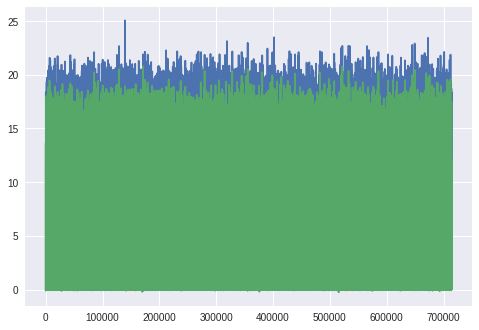

In [0]:
plt.plot(target['totals.transactionRevenue'])
plt.plot(off6)
plt.show()

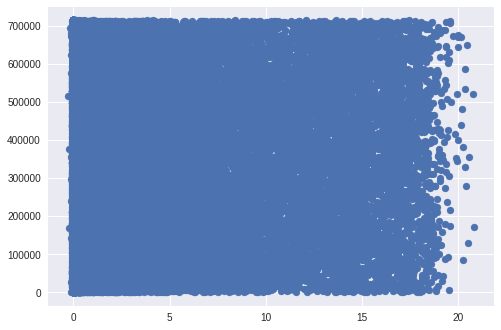

In [0]:
plt.scatter(off6,target.index)
plt.show()

In [0]:
r2_score(off6,target['totals.transactionRevenue'])

0.23915214501046755

In [0]:
len(predictions)

617242

In [0]:
test=test.reset_index()

In [0]:
test.head(3)

,fullVisitorId,channelGrouping,visitNumber,device.browser,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,totals.bounces,totals.newVisits,totals.visits,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom
0,0000000259678714014,61905.0,1.0,72467.0,61582.0,61732.000000,1195.0,62564.0,62181.0,31130.000000,61845.0,9.0,6.0,89081.0,89081.0,89081.0,NaN,89081.0,89081.0,89081.0,91585.0,77582.0,NaN,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,96088.0,96088.0,89081.0,11.0,1.5,11.5,28.5
1,0000049363351866189,50718.0,2.0,72467.0,31216.0,70522.333333,1252.0,61354.0,89081.0,70543.666667,62327.0,1.0,1.0,89081.0,89081.0,89081.0,NaN,89081.0,89081.0,89081.0,17.0,72770.0,1.0,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,9.0,1.0,9.0,19.0
2,0000053049821714864,1158.0,1.0,88175.0,80922.0,89081.000000,1195.0,1243.0,89081.0,89081.000000,62313.0,1.0,1.0,89081.0,89081.0,89081.0,NaN,89081.0,50696.0,89081.0,63714.0,92108.0,1.0,1.0,1.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,89081.0,93321.0,89491.0,65084.0,1.0,6.0,22.0,28.0


In [0]:
submission = test[['fullVisitorId']].copy()
submission.loc[:, 'PredictedLogRevenue'] = sub_preds

In [0]:
submission.shape

(617242, 2)

In [0]:
submission.head()

,fullVisitorId,PredictedLogRevenue
0,0000000259678714014,0.461893
1,0000049363351866189,0.003374
2,0000053049821714864,-0.001305
3,0000059488412965267,0.048643
4,0000085840370633780,0.000211


In [0]:
submission.to_csv('predict9.csv',index=False)

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'df_train.csv'})
uploaded.SetContentString('df_train.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1ycHlB_3KBwcRLOSmA8vhwpDTY9mjVhmf


In [0]:
file = drive.CreateFile({'root':[{u'id': '1ycHlB_3KBwcRLOSmA8vhwpDTY9mjVhmf'}]}) 
file.SetContentFile("predict9.csv")
file.Upload()

##new trnsform

In [0]:
target1  = data_train[['fullVisitorId','totals.transactionRevenue']].copy()
target1['totals.transactionRevenue']=target1['totals.transactionRevenue'].fillna(0).astype(float)
target2 = target1[['fullVisitorId', 'totals.transactionRevenue']].groupby('fullVisitorId').sum()
del target1

In [0]:
target2.head()

,totals.transactionRevenue
fullVisitorId,
0000010278554503158,0.0
0000020424342248747,0.0
0000027376579751715,0.0
0000039460501403861,0.0
0000040862739425590,0.0


In [0]:
del data_train['totals.transactionRevenue']

In [0]:
t = data_train['trafficSource.referralPath'].str.split('/',expand=True)

t.replace('','/',inplace=True)

t.columns = ['referralPath_1','referralPath_2','referralPath_3','referralPath_4','referralPath_5','referralPath_6','referralPath_7','referralPath_8','referralPath_9'
             ,'referralPath_10','referralPath_11','referralPath_12','referralPath_13','referralPath_14']

data_train = pd.concat([data_train,t],axis=1)

In [0]:
t1 = data_test['trafficSource.referralPath'].str.split('/',expand=True)

t1.replace('','/',inplace=True)
t1.columns= ['referralPath_1','referralPath_2','referralPath_3','referralPath_4','referralPath_5','referralPath_6','referralPath_7','referralPath_8','referralPath_9'
             ,'referralPath_10','referralPath_11']

data_test = pd.concat([data_test,t1],axis=1)

In [0]:
data_test['referralPath_12'] = np.nan
data_test['referralPath_13'] = np.nan
data_test['referralPath_14'] = np.nan

In [0]:
print(data_train.shape,data_test.shape)

(903653, 47) (804684, 47)


In [0]:
del t,t1,data_train['trafficSource.referralPath'],data_test['trafficSource.referralPath']


In [0]:
def ad_mapping(x):
    if  ('google' in x):
        return 'google'
    elif  ('placement' in x) | ('placememnt' in x):
        return 'placement'
    elif '(not set)' in x or 'nan' in x:
        return x
    elif 'ad' in x:
        return 'ad'
    else:
        return 'others'

In [0]:
data_train['trafficSource.adContent'] = data_train['trafficSource.adContent'].map(lambda x: ad_mapping(str(x).lower())).astype(str)

data_test['trafficSource.adContent'] = data_test['trafficSource.adContent'].map(lambda x: ad_mapping(str(x).lower())).astype(str)

In [0]:
t = data_train['geoNetwork.networkDomain'].str.split('.',expand=True)

t.columns = ['networkDomain_1','networkDomain_2','networkDomain_3']

t1 = data_test['geoNetwork.networkDomain'].str.split('.',expand=True)

t1.columns = ['networkDomain_1','networkDomain_2','networkDomain_3']

data_train = pd.concat([data_train,t],axis=1)
data_test = pd.concat([data_test,t1],axis=1)

In [0]:
del t,t1,data_train['geoNetwork.networkDomain'],data_test['geoNetwork.networkDomain']

In [0]:
def source_mapping(x):
    if  ('google' in x):
        return 'google'
    elif  ('youtube' in x):
        return 'youtube'
    elif '(not set)' in x or 'nan' in x:
        return x
    elif 'yahoo' in x:
        return 'yahoo'
    elif 'facebook' in x:
        return 'facebook'
    elif 'reddit' in x:
        return 'reddit'
    elif 'bing' in x:
        return 'bing'
    elif 'quora' in x:
        return 'quora'
    elif 'outlook' in x:
        return 'outlook'
    elif 'linkedin' in x:
        return 'linkedin'
    elif 'pinterest' in x:
        return 'pinterest'
    elif 'ask' in x:
      return 'ask'
    elif 'siliconvalley' in x:
        return 'siliconvalley'
    elif 'lunametrics' in x:
        return 'lunametrics'
    elif 'amazon' in x:
        return 'amazon'
    elif 'mysearch' in x:
        return 'mysearch'
    elif 'qiita' in x:
        return 'qiita'
    elif 'messenger' in x:
        return 'messenger'
    elif 'twitter' in x:
        return 'twitter'
    elif 't.co' in x:
        return 't.co'
    elif 'vk.com' in x:
        return 'vk.com'
    elif 'search' in x:
        return 'search'
    elif 'edu' in x:
      return 'edu'
    elif 'mail' in x:
        return 'mail'
    elif 'ad' in x:
        return 'ad'
    elif 'golang' in x:
        return 'golang'
    elif 'direct' in x:
        return 'direct'
    elif 'dealspotr' in x:
        return 'dealspotr'
    elif 'sashihara' in x:
        return 'sashihara'
    elif 'phandroid' in x:
        return 'phandroid'
    elif 'baidu' in x:
        return 'baidu'
    elif 'mdn' in x:
        return 'mdn'
    elif 'duckduckgo' in x:
        return 'duckduckgo'
    elif 'seroundtable' in x:
        return 'seroundtable'
    elif 'metrics' in x:
      return 'metrics'
    elif 'sogou' in x:
        return 'sogou'
    elif 'businessinsider' in x:
        return 'businessinsider'
    elif 'github' in x:
        return 'github'
    elif 'gophergala' in x:
        return 'gophergala'
    elif 'yandex' in x:
        return 'yandex'
    elif 'msn' in x:
        return 'msn'
    elif 'dfa' in x:
        return 'dfa'
    elif 'feedly' in x:
        return 'feedly'
    elif 'arstechnica' in x:
        return 'arstechnica'
    elif 'squishable' in x:
      return 'squishable'
    elif 'flipboard' in x:
        return 'flipboard'
    elif 't-online.de' in x:
        return 't-online.de'
    elif 'sm.cn' in x:
        return 'sm.cn'
    elif 'wow' in x:
        return 'wow'
    elif 'baidu' in x:
        return 'baidu'
    elif 'partners' in x:
        return 'partners'
    else:
        return 'others'

In [0]:
data_train['trafficSource.source'] = data_train['trafficSource.source'].map(lambda x: source_mapping(str(x).lower())).astype(str)
data_test['trafficSource.source'] = data_test['trafficSource.source'].map(lambda x: source_mapping(str(x).lower())).astype(str)

In [0]:
def process_device(data_df):
  
  colm = ['Amazon Silk','Android Webview','Chrome','Edge','Firefox','Internet Explorer','Opera','Safari','Safari (in-app)']
  
  data_df['device.browser'][(data_df['device.deviceCategory'] == 'desktop') & (~data_df['device.browser'].isin(colm))]='desktop_browser'
  data_df['device.browser'][(data_df['device.deviceCategory'] == 'tablet') & (~data_df['device.browser'].isin(colm))]='tablet_browser'
  data_df['device.browser'][(data_df['device.deviceCategory'] == 'mobile') & (~data_df['device.browser'].isin(colm))]='mobile_browser'
  return data_df

In [0]:
data_train = process_device(data_train)

data_test = process_device(data_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [0]:
print(data_train.shape,data_test.shape)

(903653, 48) (804684, 48)


In [0]:
excluded_features = ['date', 'fullVisitorId', 'sessionId','visitId','visitStartTime']

categorical_features = [
    _f for _f in data_train.columns
    if ((_f not in excluded_features) & (data_train[_f].dtype == 'object'))
]

In [0]:
data_train.fillna(value=np.nan, inplace=True)
data_test.fillna(value=np.nan,inplace=True)

data_train[categorical_features]=data_train[categorical_features].fillna('nan')

data_test[categorical_features]=data_test[categorical_features].fillna('nan')

In [0]:
train_dta = data_train.copy()
test_dta = data_test.copy()

In [0]:
for df in [train_dta, test_dta]:
    df['date'] = pd.to_datetime(df['visitStartTime'], unit='s')
    df['sess_date_doy'] = df['date'].dt.month
    df['sess_date_dow'] = df['date'].dt.dayofweek
    df['sess_date_hours'] = df['date'].dt.hour
    df['sess_date_dom'] = df['date'].dt.day

In [0]:
for i in categorical_features:
  train_dta[i][train_dta[i]=='(not set)'] = 'nan'
  train_dta[i][train_dta[i]=='(not provided)'] = 'nan'
  train_dta[i][train_dta[i]=='not available in demo dataset'] = 'nan'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
for i in categorical_features:
  test_dta[i][test_dta[i]=='(not set)'] = 'nan'
  test_dta[i][test_dta[i]=='(not provided)'] = 'nan'
  test_dta[i][test_dta[i]=='not available in demo dataset'] = 'nan'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
train_dta.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,totals.hits,totals.pageviews,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,totals.bounces,totals.newVisits,totals.visits,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom
0,Organic Search,2016-09-02 15:33:05,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,nan,Izmir,Western Asia,1,1.0,nan,nan,nan,NaN,nan,nan,nan,organic,google,1.0,1.0,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,ttnet,com,tr,9,4,15,2
1,Organic Search,2016-09-03 05:22:27,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,nan,Oceania,Australia,nan,nan,Australasia,1,1.0,nan,nan,nan,NaN,nan,nan,nan,organic,google,1.0,1.0,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,dodo,net,au,9,5,5,3
2,Organic Search,2016-09-03 01:16:26,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,nan,Community of Madrid,Southern Europe,1,1.0,nan,nan,nan,NaN,nan,nan,nan,organic,google,1.0,1.0,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown,unknown,nan,9,5,1,3


In [0]:
train_dict_cat = collections.defaultdict(dict)
test_dict_cat = collections.defaultdict(dict)

In [0]:
for i in categorical_features:
    trn_list = test_dta[categorical_features+['fullVisitorId']].groupby('fullVisitorId')\
        .apply(lambda df:list(df[i].mode().head(1)))\
        .apply(lambda x: {i: f for f in x})
    for k in trn_list.keys():
        test_dict_cat[k][i] = trn_list[k][i]
    print(i+' complete')

channelGrouping complete
device.browser complete
device.deviceCategory complete
device.operatingSystem complete
geoNetwork.city complete
geoNetwork.continent complete
geoNetwork.country complete
geoNetwork.metro complete
geoNetwork.region complete
geoNetwork.subContinent complete
trafficSource.adContent complete
trafficSource.adwordsClickInfo.adNetworkType complete
trafficSource.adwordsClickInfo.gclId complete
trafficSource.adwordsClickInfo.slot complete
trafficSource.campaign complete
trafficSource.keyword complete
trafficSource.medium complete
trafficSource.source complete
referralPath_1 complete
referralPath_2 complete
referralPath_3 complete
referralPath_4 complete
referralPath_5 complete
referralPath_6 complete
referralPath_7 complete
referralPath_8 complete
referralPath_9 complete
referralPath_10 complete
referralPath_11 complete
referralPath_12 complete
referralPath_13 complete
referralPath_14 complete
networkDomain_1 complete
networkDomain_2 complete
networkDomain_3 complete


In [0]:
len(test_dict_cat)

617242

In [0]:
exclude_set5 =['fullVisitorId','date','sessionId','visitId','visitStartTime','target','device.isMobile']
numerical_feature =[
    _f for _f in train_dta.columns
    if ((_f not in exclude_set5) & (_f not in categorical_features) & (_f is not 'device.isMobile'))
]

In [0]:
numerical_feature

['visitNumber',
 'totals.hits',
 'totals.pageviews',
 'trafficSource.adwordsClickInfo.page',
 'totals.bounces',
 'totals.newVisits',
 'totals.visits',
 'sess_date_doy',
 'sess_date_dow',
 'sess_date_hours',
 'sess_date_dom']

In [0]:
test_dic_num = collections.defaultdict(dict)

In [0]:
len(train_dict)

714167

In [0]:
tr_num = test_dta[numerical_feature+['fullVisitorId']].copy()

In [0]:
tr_num.head(3)

,visitNumber,totals.hits,totals.pageviews,trafficSource.adwordsClickInfo.page,totals.bounces,totals.newVisits,totals.visits,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom,fullVisitorId
0,2,4,4.0,NaN,NaN,NaN,1,10,0,10,16,6167871330617112363
1,1,5,5.0,NaN,NaN,1.0,1,10,0,17,16,0643697640977915618
2,1,7,7.0,NaN,NaN,1.0,1,10,0,8,16,6059383810968229466


In [0]:
tr_num['trafficSource.adwordsClickInfo.page'].fillna(0,inplace=True)
tr_num['totals.pageviews'].fillna(0,inplace=True)
tr_num['totals.bounces'].fillna(0,inplace=True)
tr_num['totals.newVisits'].fillna(0,inplace=True)

In [0]:
tr_num['trafficSource.adwordsClickInfo.page']=tr_num['trafficSource.adwordsClickInfo.page'].astype(int)
tr_num['totals.pageviews']=tr_num['totals.pageviews'].astype(int)
tr_num['totals.bounces']=tr_num['totals.bounces'].astype(int)
tr_num['totals.newVisits']=tr_num['totals.newVisits'].astype(int)

In [0]:
tr_num.head(3)

,visitNumber,totals.hits,totals.pageviews,trafficSource.adwordsClickInfo.page,totals.bounces,totals.newVisits,totals.visits,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom,fullVisitorId
0,2,4,4,0,0,0,1,10,0,10,16,6167871330617112363
1,1,5,5,0,0,1,1,10,0,17,16,0643697640977915618
2,1,7,7,0,0,1,1,10,0,8,16,6059383810968229466


In [0]:
for i in numerical_feature:
    trn_list = tr_num.groupby('fullVisitorId')\
        .apply(lambda df:list(df[i].mode().head(1)))\
        .apply(lambda x: {i: f for f in x})
    for k in trn_list.keys():
        test_dic_num[k][i] = trn_list[k][i]
    print(i+' complete')

visitNumber complete
totals.hits complete
totals.pageviews complete
trafficSource.adwordsClickInfo.page complete
totals.bounces complete
totals.newVisits complete
totals.visits complete
sess_date_doy complete
sess_date_dow complete
sess_date_hours complete
sess_date_dom complete


In [0]:
del tr_num

In [0]:
type(test_dic_num)

collections.defaultdict

In [0]:
trn_num = pd.DataFrame.from_dict(test_dic_num,orient='index')

In [0]:
trn_num['trafficSource.adwordsClickInfo.page']=trn_num['trafficSource.adwordsClickInfo.page'].astype(float)
trn_num['totals.pageviews']=trn_num['totals.pageviews'].astype(float)
trn_num['totals.bounces']=trn_num['totals.bounces'].astype(float)
trn_num['totals.newVisits']=trn_num['totals.newVisits'].astype(float)

In [0]:
trn_num['trafficSource.adwordsClickInfo.page'][trn_num['trafficSource.adwordsClickInfo.page']==0] = np.nan
trn_num['totals.pageviews'][trn_num['totals.pageviews']==0] = np.nan
trn_num['totals.bounces'][trn_num['totals.bounces']==0] = np.nan
trn_num['totals.newVisits'][trn_num['totals.newVisits']==0] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-p

In [0]:
trn_num.head(3)

,visitNumber,totals.hits,totals.pageviews,trafficSource.adwordsClickInfo.page,totals.bounces,totals.newVisits,totals.visits,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom
0000000259678714014,1,3,3.0,NaN,NaN,NaN,1,11,1,0,28
0000049363351866189,1,1,1.0,NaN,1.0,NaN,1,9,1,0,19
0000053049821714864,1,1,1.0,NaN,1.0,1.0,1,1,6,22,28


In [0]:
test = pd.DataFrame.from_dict(test_dict_cat,orient='index')

In [0]:
print(test.shape,trn_num.shape)

(617242, 35) (617242, 11)


In [0]:
test = pd.concat([test,trn_num],axis=1)

In [0]:
test.shape

(617242, 46)

In [0]:
test = test.reset_index()

In [0]:
 test=test.rename(columns={'index':'fullVisitorId'})

In [0]:
test.head(3)

,fullVisitorId,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,visitNumber,totals.hits,totals.pageviews,trafficSource.adwordsClickInfo.page,totals.bounces,totals.newVisits,totals.visits,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom
0,0000000259678714014,Organic Search,Chrome,desktop,Macintosh,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,California,Northern America,nan,nan,nan,nan,nan,nan,organic,google,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,3,3.0,NaN,NaN,NaN,1,11,1,0,28
1,0000049363351866189,Direct,Chrome,desktop,Chrome OS,Gurgaon,Asia,India,nan,Haryana,Southern Asia,nan,nan,nan,nan,nan,nan,(none),direct,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1,1,1.0,NaN,1.0,NaN,1,9,1,0,19
2,0000053049821714864,Affiliates,Safari (in-app),mobile,iOS,nan,Americas,Argentina,nan,nan,South America,nan,nan,nan,nan,Data Share Promo,nan,affiliate,partners,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,prima,net,ar,1,1,1.0,NaN,1.0,1.0,1,1,6,22,28


In [0]:
test.shape

(617242, 47)

In [0]:
for i in categorical_features:
    trn_list = test_dta[categorical_features+['fullVisitorId']].groupby('fullVisitorId')\
        .apply(lambda df:list(df[i].mode().head(1)))\
        .apply(lambda x: {i: f for f in x})
    for k in trn_list.keys():
        test_dict_cat[k][i] = trn_list[k][i]
    print(i+' complete')

In [0]:
exclude_set5 =['date','sessionId','visitId','visitStartTime','target','device.isMobile']
training_features = [f for f in train_dta.columns if(f not in exclude_set5)]

In [0]:
def full_dta(dta):
    c=[f for f in dta.columns if f is not 'fullVisitorId']
    ne = pd.DataFrame()
    for i in c:
        u_list = dta.groupby('fullVisitorId')\
            .apply(lambda df: df[i].mode().iloc[0])
        ne = pd.concat([ne,u_list],axis=1)
        print(i+' complete')
    ne.columns=[c]
    return(ne)

In [0]:
%%time
train = full_dta(train_dta[categorical_features+['fullVisitorId']])
print('----test----')
test = full_dta(test_dta[categorical_features+['fullVisitorId']])

channelGrouping complete
device.browser complete
device.deviceCategory complete
device.operatingSystem complete
geoNetwork.city complete
geoNetwork.continent complete
geoNetwork.country complete
geoNetwork.metro complete
geoNetwork.region complete
geoNetwork.subContinent complete
trafficSource.adContent complete
trafficSource.adwordsClickInfo.adNetworkType complete
trafficSource.adwordsClickInfo.gclId complete
trafficSource.adwordsClickInfo.slot complete
trafficSource.campaign complete
trafficSource.keyword complete
trafficSource.medium complete
trafficSource.source complete
referralPath_1 complete
referralPath_2 complete
referralPath_3 complete
referralPath_4 complete
referralPath_5 complete
referralPath_6 complete
referralPath_7 complete
referralPath_8 complete
referralPath_9 complete
referralPath_10 complete
referralPath_11 complete
referralPath_12 complete
referralPath_13 complete
referralPath_14 complete
networkDomain_1 complete
networkDomain_2 complete
networkDomain_3 complete
fu

In [0]:
train.shape

(714167, 36)

In [0]:
test.shape

(617242, 36)

In [0]:
train.head()

,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,fullVisitorId
fullVisitorId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000010278554503158,Organic Search,Chrome,desktop,Macintosh,nan,Oceania,New Zealand,nan,nan,Australasia,nan,nan,nan,nan,nan,nan,organic,google,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,xtra,co,nz,0000010278554503158
0000020424342248747,Organic Search,Chrome,desktop,Windows,La Victoria,Americas,Peru,nan,Lima Region,South America,nan,nan,nan,nan,nan,nan,organic,google,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,munitrujillo,gob,pe,0000020424342248747
0000027376579751715,Organic Search,Chrome,desktop,Macintosh,nan,Americas,United States,nan,nan,Northern America,nan,nan,nan,nan,nan,nan,organic,google,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,comcast,net,nan,0000027376579751715
0000039460501403861,Social,Chrome,desktop,Windows,nan,Americas,Brazil,nan,nan,South America,nan,nan,nan,nan,nan,nan,referral,youtube,/,yt,about,pt-BR,/,nan,nan,nan,nan,nan,nan,nan,nan,nan,virtua,com,br,0000039460501403861
0000040862739425590,Paid Search,Chrome,desktop,Macintosh,Oakland,Americas,United States,San Francisco-Oakland-San Jose CA,California,Northern America,nan,Google Search,Cj0KEQiAifvEBRCVx5up6Ojgr5oBEiQALHw1TrnWAHiMtZ...,Top,AW - Dynamic Search Ads Whole Site,1hZbAqLCbjwfgOH7,cpc,google,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,comcastbusiness,net,nan,0000040862739425590


In [0]:
train_dta['referralPath_1'][train_dta['fullVisitorId']=='0000039460501403861'].unique()

array(['/'], dtype=object)

In [0]:
train.head()

,fullVisitorId,channelGrouping,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.region,geoNetwork.subContinent,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.keyword,trafficSource.medium,trafficSource.source,referralPath_1,referralPath_2,referralPath_3,referralPath_4,referralPath_5,referralPath_6,referralPath_7,referralPath_8,referralPath_9,referralPath_10,referralPath_11,referralPath_12,referralPath_13,referralPath_14,networkDomain_1,networkDomain_2,networkDomain_3,visitNumber,totals.hits,totals.pageviews,trafficSource.adwordsClickInfo.page,totals.bounces,totals.newVisits,totals.visits,sess_date_doy,sess_date_dow,sess_date_hours,sess_date_dom
0,0000010278554503158,Organic Search,Chrome,desktop,Macintosh,nan,Oceania,New Zealand,nan,nan,Australasia,nan,nan,nan,nan,nan,nan,organic,google,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,xtra,co,nz,1,11,8.0,NaN,NaN,1.0,1,10,4,5,21
1,0000020424342248747,Organic Search,Chrome,desktop,Windows,La Victoria,Americas,Peru,nan,Lima Region,South America,nan,nan,nan,nan,nan,nan,organic,google,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,munitrujillo,gob,pe,1,17,13.0,NaN,NaN,1.0,1,12,3,7,1
2,0000027376579751715,Organic Search,Chrome,desktop,Macintosh,nan,Americas,United States,nan,nan,Northern America,nan,nan,nan,nan,nan,nan,organic,google,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,comcast,net,nan,1,6,5.0,NaN,NaN,1.0,1,2,6,2,12
3,0000039460501403861,Social,Chrome,desktop,Windows,nan,Americas,Brazil,nan,nan,South America,nan,nan,nan,nan,nan,nan,referral,youtube,/,yt,about,pt-BR,/,nan,nan,nan,nan,nan,nan,nan,nan,nan,virtua,com,br,1,2,2.0,NaN,NaN,1.0,1,3,0,15,27
4,0000040862739425590,Paid Search,Chrome,desktop,Macintosh,Oakland,Americas,United States,San Francisco-Oakland-San Jose CA,California,Northern America,nan,Google Search,Cj0KEQiAifvEBRCVx5up6Ojgr5oBEiQALHw1TrnWAHiMtZ...,Top,AW - Dynamic Search Ads Whole Site,1hZbAqLCbjwfgOH7,cpc,google,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,comcastbusiness,net,nan,1,2,2.0,1.0,NaN,NaN,1,2,5,18,11


In [0]:
train.to_csv('train.csv',index=False)

In [0]:
test.to_csv('test.csv',index=False)

In [0]:
ls

 adc.json  'data_test (1).csv'  'data_train (1).csv'   sample_data/   test.csv


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'test.csv'})
uploaded.SetContentString('df_train.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1VvDmeRi4Cv0OAHFD7xlyodKy5SHrzcGj


In [0]:
file = drive.CreateFile({'root':[{u'id': '1VvDmeRi4Cv0OAHFD7xlyodKy5SHrzcGj'}]}) 
file.SetContentFile("test.csv")
file.Upload()